In [1]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
max_words = 10000
maxlen = 500
training_samples = 500
validation_samples = 10000

(input_train, y_train), (input_test, y_test)= imdb.load_data(num_words=max_words)

In [4]:
print("Training Dataset-->>")
print(type(input_train)), print(type(y_train))
print(input_train.shape), print(y_train.shape)
print("\nTest Dataset-->>")
print(type(input_test)), print(type(y_test))
print(input_test.shape), print(y_test.shape)

Training Dataset-->>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000,)
(25000,)

Test Dataset-->>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000,)
(25000,)


(None, None)

In [5]:
## Already tokenized, so just need to pad_sequences
print(input_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


### Preparing training dataset -- Already tokenized, so just need to pad_sequences

In [7]:
from tensorflow.keras.preprocessing import sequence

x_train = sequence.pad_sequences(input_train, maxlen=maxlen)
print(x_train.shape)


x_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(x_test.shape)

(25000, 500)
(25000, 500)


In [ ]:
### In-general we need to make the dtype float and in range (0-1) before feeding to NN beacuse--
# 1. Since here each idx represents a word 
# 2. Secondly we are first passing to Embedding layer which deals with this and gives float values in b/w 0-1. 

In [ ]:
print(x_train.shape)
print(x_test.shape)
x_train.dtype, x_train[0][252:312]

## Model Framework

In [ ]:
max_words, maxlen

In [9]:
from tensorflow.keras import Input
from tensorflow.keras import layers, Model

embedding_dim = 100

def simpleRNN(input_shape, num_clases):
    inputs = Input(shape=input_shape)
    
    x = layers.Embedding(max_words, embedding_dim)(inputs)
    x = layers.SimpleRNN(32)(x)
    
    if num_clases ==1:
        units = 1
        activation = "sigmoid"
        
    else:
        units=num_clases
        activation = "softmax"
        
    outputs = layers.Dense(units,  activation=activation)(x)
    
    return Model(inputs, outputs)

model = simpleRNN((maxlen,), num_clases=1)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    optimizer='rmsprop',
    loss="binary_crossentropy",
    metrics=["acc"],
)

# my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=3),
#     tf.keras.callbacks.ModelCheckpoint("../models/simpleRNN.{epoch:02d}_{val_acc:.2f}.h5")
# ]

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_split=0.2,

)

Epoch 1/10
157/157 [==============================] - 41s 261ms/step - loss: 0.3452 - acc: 0.8557 - val_loss: 0.3562 - val_acc: 0.8464
Epoch 2/10
157/157 [==============================] - 40s 253ms/step - loss: 0.2633 - acc: 0.8949 - val_loss: 0.3714 - val_acc: 0.8544
Epoch 3/10
157/157 [==============================] - 44s 279ms/step - loss: 0.1959 - acc: 0.9280 - val_loss: 0.3776 - val_acc: 0.8538
Epoch 4/10
157/157 [==============================] - 42s 269ms/step - loss: 0.1200 - acc: 0.9589 - val_loss: 0.4285 - val_acc: 0.8618
Epoch 5/10
157/157 [==============================] - 42s 268ms/step - loss: 0.0709 - acc: 0.9768 - val_loss: 0.5884 - val_acc: 0.8194
Epoch 6/10
157/157 [==============================] - 41s 263ms/step - loss: 0.0411 - acc: 0.9884 - val_loss: 0.8231 - val_acc: 0.7022
Epoch 7/10
157/157 [==============================] - 43s 272ms/step - loss: 0.0250 - acc: 0.9933 - val_loss: 0.6170 - val_acc: 0.8186
Epoch 8/10
157/157 [==============================] - 4

## Plotting the graph

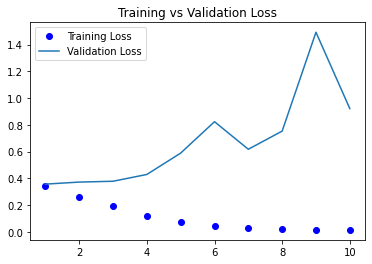

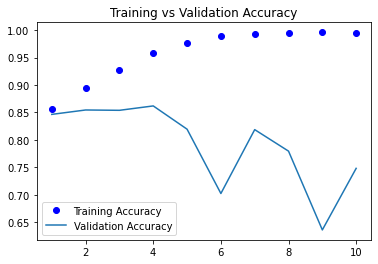

In [18]:
train_acc = history.history["acc"]
val_acc = history.history["val_acc"]

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(train_loss)+1)

plt.title("Training vs Validation Loss")
plt.plot(epochs, train_loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "-", label="Validation Loss")
plt.legend()
plt.show()

plt.title("Training vs Validation Accuracy")
plt.plot(epochs, train_acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "-", label="Validation Accuracy")
plt.legend()
plt.show()



In [ ]:
# idxs = np.arange(sequences.shape[0])
# np.random.shuffle(idxs)
# idxs

In [ ]:
# x_ts = sequences[:training_samples]
# y_ts = y_train[:training_samples]

# x_vals = sequences[training_samples: training_samples+validation_samples]
# y_vals = y_train[training_samples: training_samples+validation_samples]

In [ ]:
# print("Training Dataset-->>")
# print(type(x_ts)), print(type(y_ts))
# print(x_ts.shape), print(y_ts.shape)
# print("\nTest Dataset-->>")
# print(type(x_vals)), 
# print(type(y_vals))
# print(x_vals.shape),
# print(y_vals.shape)

## Model Framework

In [ ]:
x_ts.shape[1], maxlen